In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'

Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import os
from matplotlib_venn import venn2


In [3]:
# marker_df = pd.read_csv('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_batch_noZ/Level1/ACT_annotation/Human_blood_marker_processed.csv')
marker_df = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level1/ACT_annotation/Human_blood_marker_processed.csv')
print(marker_df.shape)
marker_df.head()

(147, 6)


,Species,Tissue,super_type,CellType,Marker,Resource
0,Human,Blood,B,Activated B cell,"CD5, MIR155HG, TAGLN2","35025971, 28910360, 2474446"
1,Human,Blood,T_CD4,"Activated CD4-positive, alpha-beta T cell","CD4, CCR6, CD14, CD19, CD38, CD3D, CD3G, CD69,...","35381424, 32783921, 35831277, 34529726, 103413..."
2,Human,Blood,T_CD4,"Activated CD4-positive, CD25-positive, CCR4-po...","CD3D, CD3E, CD3G, CD4, FOXP3",30977974
3,Human,Blood,NaN,Adult endothelial progenitor cell,"KDR, PROM1, CD34, PTPRC, PECAM1, CD14","27561827, 29391882, 24641802, 29147957, 267700..."
4,Human,Blood,T,Alpha-beta T cell,"CD3D, CD3E, CD3G, IL7R","34284174, 28777444"


## Read PreLect features

In [4]:
types = ['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']

In [ ]:
# os.chdir('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_batch_noZ/Level1/large_lambda/features')
os.chdir(source_code_dir / 'PBMC_Hao_batch_noZ/Level1/large_lambda/features')

features_dict = {}
# Read features for each celltype
for celltype in types:
    try:
        feature_df_k3 = pd.read_csv(f'{celltype}_features.txt', names=['Gene', 'Weight', 'Tendency'], sep='\t')
        features_dict[celltype] = feature_df_k3
    except:
        print('skipping:', celltype)
        continue

count_df_k3 = pd.DataFrame(columns=['Feature_count', 'Positive_feature_count'])
for celltype in features_dict.keys():
    feature_df_k3 = features_dict[celltype]
    feature_count = feature_df_k3.shape[0]
    positive_count = feature_df_k3[feature_df_k3['Tendency'] == 1].shape[0]
    count_df_k3.loc[celltype] = [feature_count, positive_count]
count_df_k3

In [6]:
# Do two comparisons:
#   1. All_PreLect vs. Marker in database
#   2. Positive_PreLect vs. Marker in database
def compare_PreLect_w_marker(celltype, PreLect_dict, marker_genes, name=''):
    if name == '':
        name = celltype
    # Extracting the features and marker genes
    feature_df = PreLect_dict[celltype]
    features = feature_df['Gene'].tolist()
    positve_features = feature_df[feature_df['Tendency'] == 1]['Gene'].tolist()
    # marker_genes = marker_df['official gene symbol'].tolist()

    ### All features
    # Finding common elements
    common_all = list(set(features) & set(marker_genes))
    print(celltype, 'All features common with markers:', len(common_all))
    # Preparing sets for Venn diagram
    features_set = set(features)
    marker_genes_set = set(marker_genes)
    # Plotting Venn diagram
    plt.figure(figsize=(8, 5))
    v = venn2([features_set, marker_genes_set], set_labels=('PreLect all', f'{name} Marker'))
    plt.title(name, fontsize=16)
    for text in v.set_labels:
        text.set_fontsize(14)
    for text in v.subset_labels:
        text.set_fontsize(16)
    plt.show()

    ### Positive features
    # Finding common elements
    common_positive = list(set(positve_features) & set(marker_genes))
    print(celltype, 'Positive features common with markers:', len(common_positive))
    # Preparing sets for Venn diagram
    positive_features_set = set(positve_features)
    marker_genes_set = set(marker_genes)
    # Plotting Venn diagram
    plt.figure(figsize=(8, 5))
    v = venn2([positive_features_set, marker_genes_set], set_labels=('PreLect positive', f'{name} Marker'), set_colors=('blue', 'green'))
    plt.title(name, fontsize=16)
    for text in v.set_labels:
        text.set_fontsize(14)
    for text in v.subset_labels:
        text.set_fontsize(16)
    plt.show()

    return common_all, common_positive


In [7]:
def get_celltype_marker(name, marker_df):
    string = marker_df[marker_df['CellType'] == name]['Marker'].tolist()[0]
    marker_list = string.split(', ')
    return marker_list

## CD4 T

CD4_T All features common with markers: 8


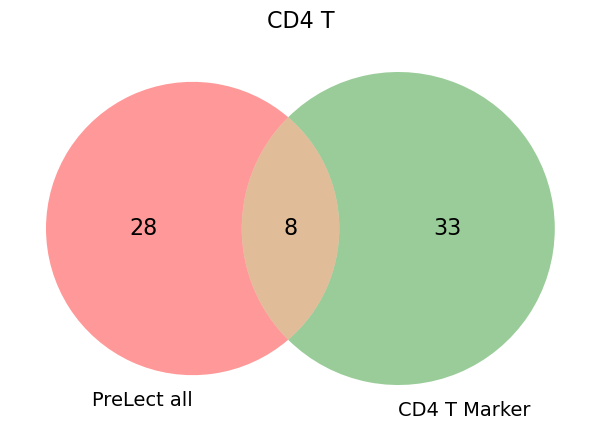

CD4_T Positive features common with markers: 5


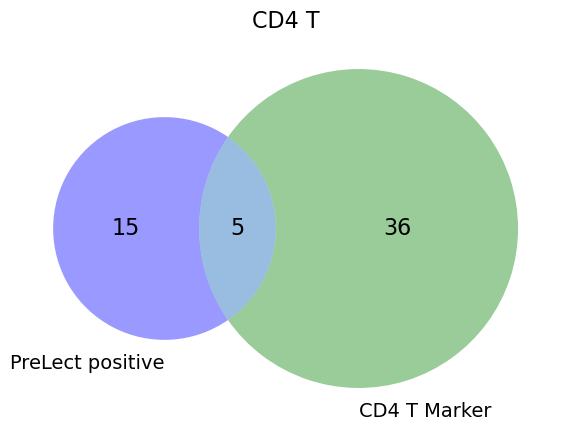

CD4t_common: ['LDHB', 'CD3G', 'IL7R', 'CCL5', 'LTB', 'MT-ND4', 'NKG7', 'CD3D']
CD4t_common_p: ['LDHB', 'CD3G', 'IL7R', 'LTB', 'CD3D']


In [8]:
name = 'CD4-positive, alpha-beta T cell'
CD4t_common, CD4t_common_p = compare_PreLect_w_marker('CD4_T', features_dict, get_celltype_marker(name, marker_df), name='CD4 T')
print('CD4t_common:', CD4t_common)
print('CD4t_common_p:', CD4t_common_p)

CD4_T All features common with markers: 9


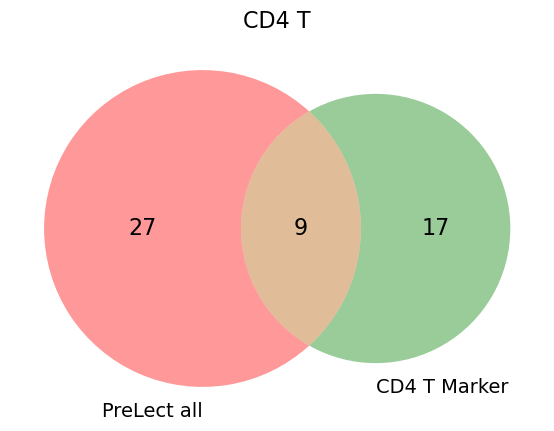

CD4_T Positive features common with markers: 9


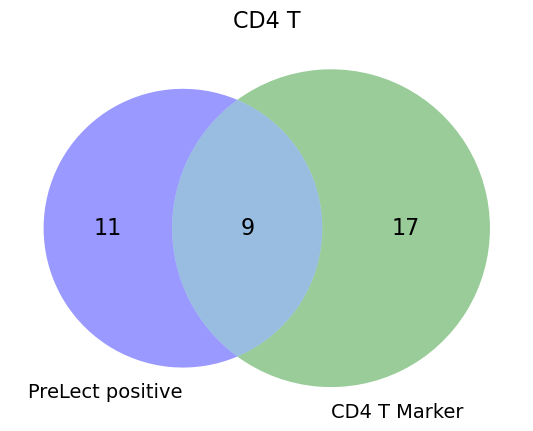

CD4t_common: ['TMSB10', 'LDHB', 'CD3G', 'IL32', 'TRAC', 'ITGB1', 'IL7R', 'LTB', 'CD3D']
CD4t_common_p: ['TMSB10', 'LDHB', 'CD3G', 'IL32', 'TRAC', 'ITGB1', 'IL7R', 'LTB', 'CD3D']


In [9]:
name = 'Central memory CD4-positive, alpha-beta T cell'
CD4t_common, CD4t_common_p = compare_PreLect_w_marker('CD4_T', features_dict, get_celltype_marker(name, marker_df), name='CD4 T')
print('CD4t_common:', CD4t_common)
print('CD4t_common_p:', CD4t_common_p)

## DC

DC All features common with markers: 7


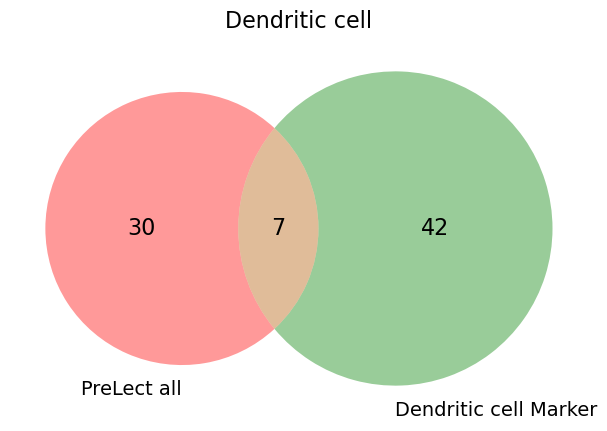

DC Positive features common with markers: 5


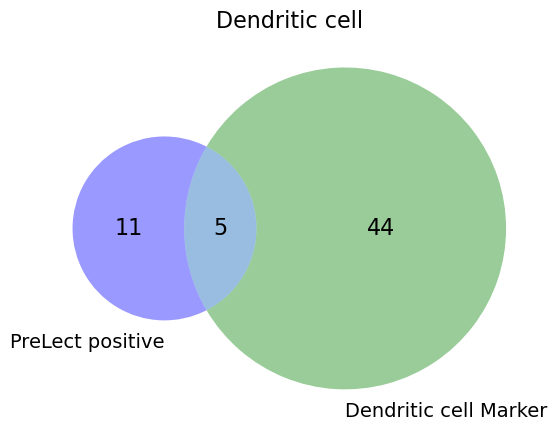

DC_common: ['HLA-DPB1', 'FCER1A', 'FTL', 'HLA-DPA1', 'CST3', 'S100A9', 'HLA-DRA']
DC_common_p: ['HLA-DPB1', 'FCER1A', 'CST3', 'HLA-DPA1', 'HLA-DRA']


In [10]:
name = 'Dendritic cell'
DC_common, DC_common_p = compare_PreLect_w_marker('DC', features_dict, get_celltype_marker(name, marker_df), name='Dendritic cell')
print('DC_common:', DC_common)
print('DC_common_p:', DC_common_p)

## Monocyte

Mono All features common with markers: 11


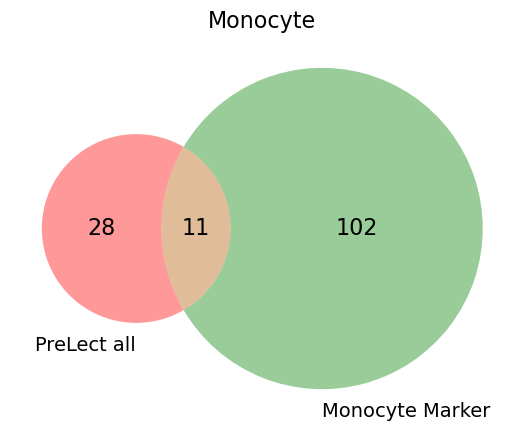

Mono Positive features common with markers: 10


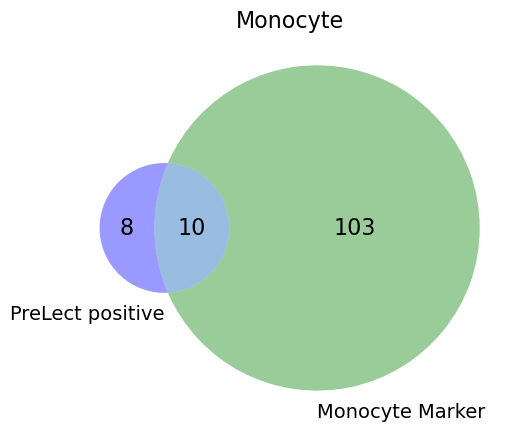

Mono_common: ['FCN1', 'FTL', 'CFD', 'CD14', 'LST1', 'MALAT1', 'S100A9', 'CTSS', 'S100A8', 'PSAP', 'NEAT1']
Mono_common_p: ['FCN1', 'FTL', 'CFD', 'CD14', 'LST1', 'CTSS', 'S100A9', 'S100A8', 'PSAP', 'NEAT1']


In [11]:
name = 'Monocyte'
Mono_common, Mono_common_p = compare_PreLect_w_marker('Mono', features_dict, get_celltype_marker(name, marker_df), name='Monocyte')
print('Mono_common:', Mono_common)
print('Mono_common_p:', Mono_common_p)

## Other T

other_T All features common with markers: 5


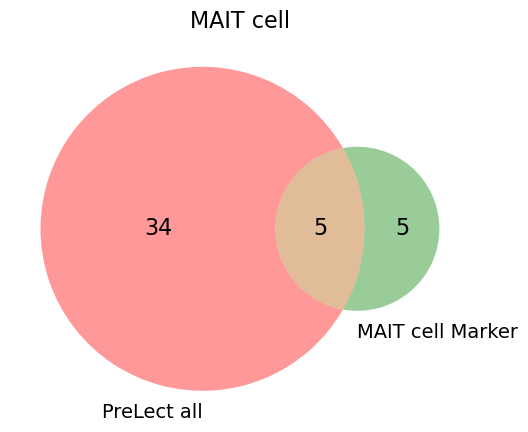

other_T Positive features common with markers: 5


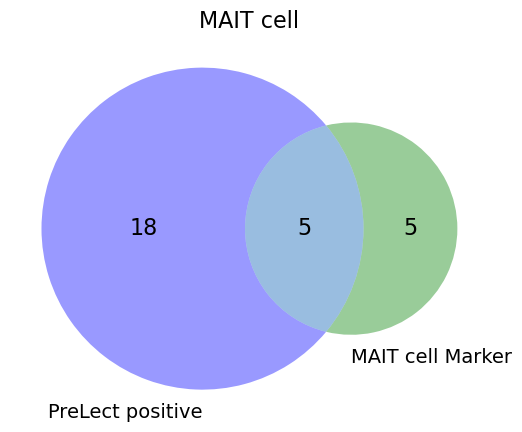

MAIT_common: ['CD3G', 'CXCR4', 'CD3E', 'KLRB1', 'CD3D']
MAIT_common_p: ['CD3G', 'CXCR4', 'CD3E', 'KLRB1', 'CD3D']


In [14]:
name = 'Mucosal invariant T cell'
MAIT_common, MAIT_common_p = compare_PreLect_w_marker('other_T', features_dict, get_celltype_marker(name, marker_df), name='MAIT cell')
print('MAIT_common:', MAIT_common)
print('MAIT_common_p:', MAIT_common_p)

other_T All features common with markers: 5


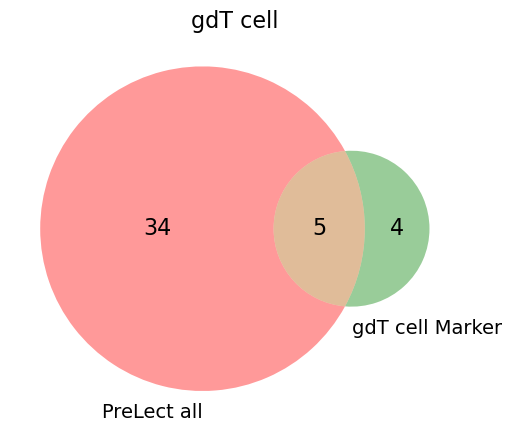

other_T Positive features common with markers: 5


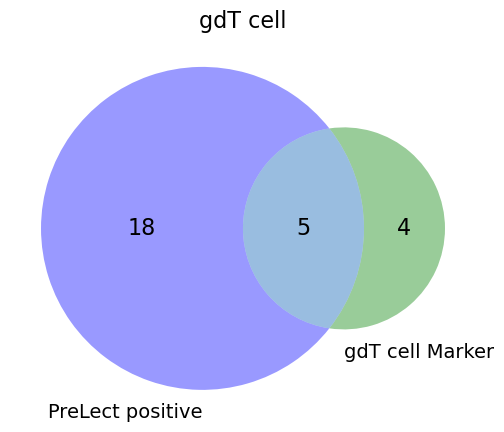

gdT_common: ['TRDC', 'TRGC1', 'CD3E', 'TRGC2', 'CD3D']
gdT_common_p: ['TRDC', 'TRGC1', 'CD3E', 'TRGC2', 'CD3D']


In [15]:
name = 'Gamma-delta T cell'
gdT_common, gdT_common_p = compare_PreLect_w_marker('other_T', features_dict, get_celltype_marker(name, marker_df), name='gdT cell')
print('gdT_common:', gdT_common)
print('gdT_common_p:', gdT_common_p)